In [14]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import random
from collections import Counter

In [2]:
# Upload dataset
from google.colab import files
uploaded = files.upload()

Saving lottery-br-mega-sena.csv to lottery-br-mega-sena.csv


In [3]:
# Load the dataset
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

In [4]:
# Display the first few rows
print("Dataset Preview:")
print(data.head())

Dataset Preview:
   Unnamed: 0  DrawNumber             DrawDate  Ball1  Ball2  Ball3  Ball4  \
0           0           1  1996-03-11 00:00:00      4      5     30     33   
1           1           2  1996-03-18 00:00:00      9     37     39     41   
2           2           3  1996-03-25 00:00:00     10     11     29     30   
3           3           4  1996-04-01 00:00:00      1      5      6     27   
4           4           5  1996-04-08 00:00:00      1      2      6     16   

   Ball5  Ball6  
0     41     52  
1     43     49  
2     36     47  
3     42     59  
4     19     46  


In [5]:
# Clean the dataset: Remove unnecessary columns
data_cleaned = data.drop(columns=["Unnamed: 0", "DrawNumber", "DrawDate"], errors='ignore')

In [6]:
# Frequency Analysis
all_numbers = data_cleaned.values.flatten()
number_frequencies = pd.Series(all_numbers).value_counts().sort_values(ascending=False)

In [7]:
# Display numbers sorted by frequency (high to low)
print("\nNumbers Sorted by Frequency (High to Low):")
print(number_frequencies)


Numbers Sorted by Frequency (High to Low):
10    328
53    319
33    305
34    304
5     303
37    302
42    299
44    298
32    298
23    298
35    297
30    297
38    297
11    296
43    295
41    295
17    295
46    293
4     293
27    293
16    292
28    291
56    290
13    289
54    287
49    285
51    284
36    283
29    282
6     282
52    281
25    280
24    279
2     279
45    278
20    277
8     276
50    275
59    274
14    273
58    272
1     271
57    270
19    270
47    269
18    269
60    269
7     266
39    266
12    266
9     265
40    262
3     262
48    260
31    259
22    252
15    239
55    238
21    235
26    234
Name: count, dtype: int64


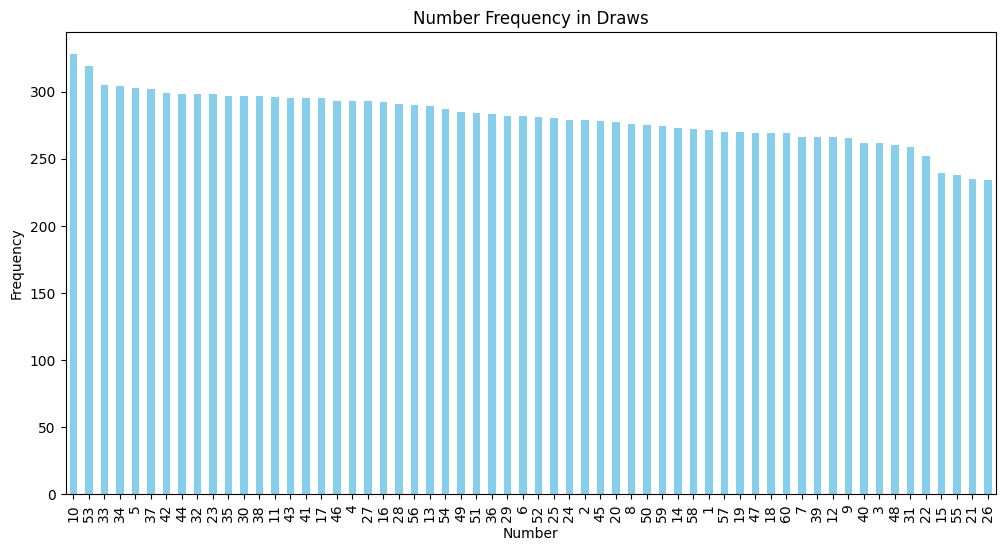

In [8]:
# Plot frequency analysis
plt.figure(figsize=(12, 6))
number_frequencies.plot(kind='bar', color='skyblue')
plt.title("Number Frequency in Draws")
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.show()

In [9]:
# Prepare data for machine learning
balls = ["Ball1", "Ball2", "Ball3", "Ball4", "Ball5", "Ball6"]
X_train, X_test, y_train, y_test = train_test_split(
    data_cleaned.index.values.reshape(-1, 1), data_cleaned[balls], test_size=0.2, random_state=42
)

In [10]:
# Train a decision tree classifier for each ball
classifiers = {}
predictions = {}
all_predictions = []

In [11]:
print("\nTraining Decision Tree Classifiers...")
for ball in balls:
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train[ball])
    classifiers[ball] = clf
    ball_predictions = clf.predict(X_test)
    predictions[ball] = ball_predictions
    all_predictions.extend(ball_predictions)  # Collect all predictions for ranking

    print(f"Accuracy for {ball}: {accuracy_score(y_test[ball], ball_predictions):.4f}")


Training Decision Tree Classifiers...
Accuracy for Ball1: 0.0498
Accuracy for Ball2: 0.0249
Accuracy for Ball3: 0.0338
Accuracy for Ball4: 0.0267
Accuracy for Ball5: 0.0320
Accuracy for Ball6: 0.0480


In [12]:
# Aggregate the predictions to identify the most common numbers
top_predicted_numbers = Counter(all_predictions).most_common(10)
print("\nTop 10 Predicted Numbers:")
for number, count in top_predicted_numbers:
    print(f"Number: {number}, Predicted Frequency: {count}")


Top 10 Predicted Numbers:
Number: 10, Predicted Frequency: 79
Number: 27, Predicted Frequency: 79
Number: 17, Predicted Frequency: 72
Number: 25, Predicted Frequency: 70
Number: 51, Predicted Frequency: 67
Number: 43, Predicted Frequency: 67
Number: 3, Predicted Frequency: 66
Number: 38, Predicted Frequency: 66
Number: 56, Predicted Frequency: 66
Number: 49, Predicted Frequency: 66


In [17]:
# Generate top 10 sets of 6 numbers from the predicted numbers
top_numbers = [num for num, _ in top_predicted_numbers]
print("\nTop 30 Sets of 6 Numbers (Predicted):")
for i in range(30):
    prediction_set = sorted(random.sample(top_numbers, 6))
    print(f"Set {i+1}: {prediction_set}")


Top 30 Sets of 6 Numbers (Predicted):
Set 1: [10, 17, 25, 43, 49, 56]
Set 2: [10, 17, 25, 38, 43, 51]
Set 3: [3, 10, 17, 38, 51, 56]
Set 4: [10, 17, 25, 27, 43, 49]
Set 5: [17, 25, 27, 43, 51, 56]
Set 6: [10, 17, 43, 49, 51, 56]
Set 7: [3, 27, 38, 49, 51, 56]
Set 8: [3, 17, 25, 27, 43, 49]
Set 9: [3, 25, 27, 49, 51, 56]
Set 10: [17, 25, 38, 49, 51, 56]
Set 11: [3, 10, 25, 43, 49, 51]
Set 12: [3, 17, 25, 27, 38, 56]
Set 13: [3, 17, 27, 43, 49, 56]
Set 14: [3, 10, 17, 38, 43, 49]
Set 15: [3, 17, 27, 38, 43, 56]
Set 16: [3, 17, 27, 43, 51, 56]
Set 17: [25, 27, 43, 49, 51, 56]
Set 18: [25, 27, 38, 49, 51, 56]
Set 19: [3, 17, 27, 38, 49, 51]
Set 20: [3, 17, 25, 27, 38, 49]
Set 21: [3, 17, 27, 43, 49, 56]
Set 22: [10, 27, 38, 43, 49, 56]
Set 23: [10, 17, 25, 27, 38, 56]
Set 24: [10, 17, 25, 27, 38, 51]
Set 25: [3, 17, 25, 27, 43, 49]
Set 26: [3, 25, 27, 38, 43, 49]
Set 27: [17, 25, 27, 38, 51, 56]
Set 28: [17, 25, 27, 38, 49, 51]
Set 29: [10, 17, 25, 38, 43, 51]
Set 30: [3, 17, 25, 27, 38, 